### Machine Learning Assignment - Naive Bayes and Random Forest
Course code : CMPE-257 
Group name : Codebusters 

- Task Breakdown
    1. Anushri Srinath Aithal(012506897) - Data preprocessing, Data Enrichment, KMeans, Linear Regression & Latent Manifold, PCA, Feature Selection
    2. Harini Balakrishnan(010830755) - GMM, Decision Tree, KNN, Classification report generation and analysis
    3. Ravi Katta(012127011) - Logistic Regression, Data preprocessing, SVM, Visualization
    4. Sunder Thyagarajan (011528062) - Business story, Naive Bayes, SVM, Random Forest, Web scraped data cleaning, Feature Selection

##### What is fantasy premier league?
The Fantasy Premier League, or the FPL, is an online game which is played at https://fantasy.premierleague.com/a/home

You are given a budget of 100 million(fake money, obviously), to buy a squad of 15 players consisting of 2 goalkeepers, 5 defenders, 5 midfielders and 3 forwards with the added rule of being able to select a maximum of 3 players from any particular Barclays Premier League team. The cost of a player is pre-determined by the game developers, based on the player's popularity and performance in the last football season.

##### What is the problem we are trying to solve?
There are totally 5,777,689 players that play FPL which includes some of our team members. This is a very popular game and gives players bragging rights amongst friends based on your FPL scores. It is paramount to predict which players in your team will score high points in the following gameweek. This will help select the right players for your team. Any player who is picked as captain will get twice the points that they score. Within FPL, a score above 8 points is a success in a gameweek.

FPL is so desgined that every player in the game will have price raise or decrease based on various features, so it would be very useful to predict this information in order to fit the right players within the 100 million budget given to every FPL player. This will allow FPL players to fit the right team before the price increases for a given player. This will be a classification problem.

##### Problem statements
- We decided to cluster based on players ICT values and Points scored, Points Scored and Market Value.
- We decided to predict the players points and market value based on historical data.
- We decided to classify the players that will score more than 8 points the following gameweek based on historic data.
- We decided to classify if the price of a player will increase before the following gameweek.

##### Describe datasources

1. Kaggle https://www.kaggle.com/delayedkarma/fantasy-premier-league-20182019/version/2
    Name: Player Name, as referenced in the FPL teamsheets
    Team: Team Name (3 letter abbreviation)
    Position: Player Position (3 letter abbreviation)
    Cost: Cost of the player in the concluding Gameweek of the 2017-18 season (in units of 0.1 million pounds)
    Creativity: Assesses player performance in terms of producing goalscoring opportunities for others.
    Influence: This evaluates the degree to which that player has made an impact on a single match or throughout the season.
    Threat: A value that examines a player's threat on goal
    ICT: Statistical Index combining the Influence, Creativity and Threat data
    Goals_conceded: Number of goals conceded while the player was on the field
    Goals_scored: Goals scored by the player
    Assists: Assists provided by the player
    Own_goals: Own goals scored by the player
    Penalties_missed: Penalties missed by the player (Usually applies to Goalkeepers)
    Penalties_saved: Penalties saved by the player (Usually applies to Goalkeepers)
    Saves: Saves made by the player (Usually applies to Goalkeepers)
    Yellow_cards: Yellow cards received by the player
    Red_cards: Red cards received by the player
    TSB: % of teams in which the player has been selected
    Minutes: Minutes played by the player
    Bonus: Bonus points received by the player
    Points: Points scored by the player
2. https://fantasy.premierleague.com : As discussed with professor we did investigative journalism on their website and found they are using react framework for building the website. We monitored the network tab on chrome and identified the API calls that were made.

    Overall Stats : https://fantasy.premierleague.com/drf/bootstrap-static
    Player Details : https://fantasy.premierleague.com/drf/element-summary/
3. https://www.transfermarkt.co.uk : To identify age of a player and their market value, we scraped data from transfermarket

##### Cleaning
Step 1: Remove special characters
We used data from all the above sources, but needed to clean up a lot of data before it could be used. Each of the datasources had different encodings, which led player names include a lot of special characters. We had characters that originated from the following languages

English
Spanish
French
German
Portugese
Baltic
Slavic
Norwegian
Danish
We cleaned them individually by looking into the whole dataset and identifying the unicode characters for all the special characters included

Step 2: Remove unusable players
A lot of players did not have any statistics as they had either moved out of the league or loaned to another country. The data for these players added a lot of discrepancy to the dataset, so we excluded players who did not have most of the statistics mentioned above

Step 3: Removing unwanted character from web scraped data

Step4: Converting all market value as a number in millions

Step5: Filling null values with 0

##### Datasources integration and enrichment

- Data integration
    We will integrate the data sources, leveraging the players last name, which was cleaned up in the previous cleaning process. We will then loop through the list of all players and retrieve the historic data for every player and collate them to form the data set that can be used for modeling.The enriched data has to be cleaned to convert market value to number, age to number. Enrich the fpl 2017 data with 2018 and 2019 scores, points, ict and clean sheets for further analysis

- Data enrichment and latent manifold
1. From the web page https://www.transfermarkt.co.uk scraped team-wise player age and market value
2. Used BeautifulSoup as the html scraper
3. Found the table contents and scraped the age and market value for each player.
4. Stored this in fpl_3.csv file
5. Merged the base data with this new data based on player last name
6. Found some special characters in player name as this is scraped from web. Hence, performed manual cleaning of this to remove special characters and fetch the appropriate last name.
7. After enrichment, the data needed some cleaning. Price had to be stripped off the symbols and converted to float. Age had both date of birth and age. Performed string operations to only extract age and strip of the other characters.
8. Age can be a factor that influences user game. Hence we are considering this as a latent variable in our dataset.

##### Data Enrichment using PCA
 PCA is used for uderstanding the feature importance and represent multi-linear regression in two dimensional space.
 
##### Data Enrichment by deriving columns

2018 Gameweek data parameters are all aggregated per player and is normalized to remove outliers. These features are then used for identifying the best influencing features using Random Forest and feature selection for classifying players who would score more than 8 points in the upcoming gameweek.

##### Pattern Analysis
We will leverage clustering, regression and classifiction algorithms to identify the features that are greatly influencing the points a player will score and how his price will fluctuate.

TODO talk about how pair plotting, PCA, Kmeans, GMM, Linear regression helped identify this

Also talk about how RandomForest Clustering helps identify the top 10 features

#### Load Data using numpy library

Loading the first data source from https://www.kaggle.com/delayedkarma/fantasy-premier-league-20182019/version/2 Name: Player Name, as referenced in the FPL teamsheets Team: Team Name (3 letter abbreviation) Position: Player Position (3 letter abbreviation) Cost: Cost of the player in the concluding Gameweek of the 2017-18 season (in units of 0.1 million pounds) Creativity: Assesses player performance in terms of producing goalscoring opportunities for others. Influence: This evaluates the degree to which that player has made an impact on a single match or throughout the season. Threat: A value that examines a player's threat on goal ICT: Statistical Index combining the Influence, Creativity and Threat data Goals_conceded: Number of goals conceded while the player was on the field Goals_scored: Goals scored by the player Assists: Assists provided by the player Own_goals: Own goals scored by the player Penalties_missed: Penalties missed by the player (Usually applies to Goalkeepers) Penalties_saved: Penalties saved by the player (Usually applies to Goalkeepers) Saves: Saves made by the player (Usually applies to Goalkeepers) Yellow_cards: Yellow cards received by the player Red_cards: Red cards received by the player TSB: % of teams in which the player has been selected Minutes: Minutes played by the player Bonus: Bonus points received by the player Points: Points scored by the player

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import requests
from bs4 import BeautifulSoup

fields = ['Name','Team','Position','Cost','Creativity','Influence','Threat','ICT','Goals_conceded','Goals_scored','Assists','Own_goals','Penalties_missed','Penalties_saved','Saves','Yellow_cards','Red_cards','TSB','Minutes','Bonus','Points']
fpl_base_data = pd.read_csv('input_data/fpl/fpl_1.csv', skipinitialspace=True, usecols=fields)
fpl_base_data.head(5)

,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,...,Own_goals,Penalties_missed,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points
0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,1,...,0,0,0,0,6,0,0.3,2067,3,56
1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,0,...,0,0,0,69,2,0,0.6,1710,5,72
2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,21,...,0,0,0,0,2,0,12.6,1960,22,169
3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,2,...,0,0,0,0,5,0,5.7,3352,8,102
4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,2,...,0,0,0,0,5,1,1.1,2533,12,107


In [2]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### Data Preprocessing

1. The feature "Name" is broken into "First Name and Last Name" based on space. From the data it is observed that most player last name is present in this data set.
2. All unique team names are fetched as this is required for data enrichment.

In [3]:
fpl_base_data[['first_name','last_name']] = fpl_base_data['Name'].loc[fpl_base_data['Name'].str.split().str.len() == 2].str.split(expand=True)
fpl_base_data.last_name.fillna(fpl_base_data.Name, inplace=True)
fpl_base_data.head(5)

,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,...,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points,first_name,last_name
0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,1,...,0,0,6,0,0.3,2067,3,56,Adam,Smith
1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,0,...,0,69,2,0,0.6,1710,5,72,NaN,Adrian
2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,21,...,0,0,2,0,12.6,1960,22,169,NaN,Aguero
3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,2,...,0,0,5,0,5.7,3352,8,102,NaN,Ake
4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,2,...,0,0,5,1,1.1,2533,12,107,NaN,Albrighton


In [4]:
fpl_base_data.Team.unique()

array(['BOU', 'WHU', 'MCI', 'LEI', 'TOT', 'LIV', 'CHE', 'BHA', 'SOU',
       'NEW', 'ARS', 'FUL', 'HUD', 'MUN', 'EVE', 'CAR', 'BUR', 'WOL',
       'CRY', 'WAT'], dtype=object)

#### Data Enrichment and Latent Manifold

1. From the web page https://www.transfermarkt.co.uk scraped team-wise player age and market value
2. Used BeautifulSoup as the html scraper
3. Found the table contents and scraped the age and market value for each player.
4. Stored this in fpl_3.csv file
5. Merged the base data with this new data based on player last name
6. Found some special characters in player name as this is scraped from web. Hence, performed manual cleaning of this to remove special characters and fetch the appropriate last name.
7. After enrichment, the data needed some cleaning. Price had to be stripped off the symbols and converted to float. Age had both date of birth and age. Performed string operations to only extract age and strip of the other characters.
8. Age can be a factor that influences user game. Hence we are considering this as a latent variable in our dataset.

In [5]:
url_list = {"BOU":"https://www.transfermarkt.co.uk/afc-bournemouth/kader/verein/989/saison_id/2018",
            "BHA":"https://www.transfermarkt.co.uk/brighton-amp-hove-albion/kader/verein/1237/saison_id/2018",
            "ARS":"https://www.transfermarkt.co.uk/arsenal-fc/kader/verein/11/saison_id/2018",
            "WHU":"https://www.transfermarkt.co.uk/west-ham-united/kader/verein/379/saison_id/2018",
            "MCI":"https://www.transfermarkt.co.uk/manchester-city/kader/verein/281/saison_id/2018",
            "LEI":"https://www.transfermarkt.co.uk/leicester-city/kader/verein/1003/saison_id/2018",
            "TOT":"https://www.transfermarkt.co.uk/tottenham-hotspur/kader/verein/148/saison_id/2018",
            "LIV":"https://www.transfermarkt.co.uk/fc-liverpool/kader/verein/31/saison_id/2018",
            "CHE":"https://www.transfermarkt.co.uk/fc-chelsea/kader/verein/631/saison_id/2018",
            "SOU":"https://www.transfermarkt.co.uk/fc-southampton/kader/verein/180/saison_id/2018",
            "FUL":"https://www.transfermarkt.co.uk/fc-fulham/kader/verein/931/saison_id/2018",
            "HUD":"https://www.transfermarkt.co.uk/huddersfield-town/kader/verein/1110/saison_id/2018",
            "MUN":"https://www.transfermarkt.co.uk/manchester-united/kader/verein/985/saison_id/2018",
            "EVE":"https://www.transfermarkt.co.uk/fc-everton/kader/verein/29/saison_id/2018",
            "CAR":"https://www.transfermarkt.co.uk/cardiff-city/kader/verein/603/saison_id/2018",
            "BUR":"https://www.transfermarkt.co.uk/fc-burnley/kader/verein/1132/saison_id/2018",
            "WOL":"https://www.transfermarkt.co.uk/wolverhampton-wanderers/kader/verein/543/saison_id/2018",
            "WAT":"https://www.transfermarkt.co.uk/fc-watford/kader/verein/1010/saison_id/2018",
            "NEW":"https://www.transfermarkt.co.uk/newcastle-united/kader/verein/762/saison_id/2018",
            "CRY":"https://www.transfermarkt.co.uk/crystal-palace/kader/verein/873/saison_id/2018"}

#### Web Scraper to fetch Player Age and Market Value

In [6]:
#method to extract player age and market value
def extract_player_age_market_value():
    player_details = []
    for team_name, request_url in url_list.items():
        page = requests.get(request_url, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(page.text, "html.parser")
        for div in soup.find_all(name="div", attrs={"class":"row"}):
            for tab in div.find_all(name="table", attrs={"class":"items"}):
                for tr in tab.find_all(name="tr", attrs={"class":{"odd","even"}}):
                    a = tr.find_all(name="a", attrs={"class":"spielprofil_tooltip"})
                    player_details.append({'Name':a[0].contents[0], 'Age':tr.contents[3].text, 'Market_Value':tr.contents[6].text, 'Team': team_name})
    player_details = pd.DataFrame(player_details)
    return(player_details)

In [8]:
#remove special characters from name
all_team_details = extract_player_age_market_value()
all_team_details = all_team_details.replace({'\u00c4':'A', '\u00e4':'a','\u00cb':'E', '\u00eb':'e','\u00e9':'e','\u00cf':'I', '\u00ef':'i','\u00d6': 'O', 
                                       '\u00f6' : 'o','\u00dc':'U','\u00fc':'u','\u03b2':'ss', 'í':'i','ß': 'ss','á' : 'a', 'à' : 'a','Á':'A', 'ó' : 'o','ã':'a' , 'ø':'o', 
                                       '\u00e0':'a','\u00e2':'a','\u00e6':'a','\u00e8':'e','\u00e9':'e','\u00eA':'e','\u00ee':'i','\u00f4':'o','\u0153':'o','\u00f9':'u',
                                       '\u00fb':'u','\u00ff':'y','\u00e7':'c','\u00c0':'A','\u00c2':'A','\u00c6':'A','\u00c8':'E','\u00c9':'E','\u00ca':'E','\u00ce':'I',
                                       '\u00d4':'O','\u0152':'O','\u00d9':'U','\u00db':'U','\u0178':'Y','\u00c7':'C'}, regex=True)
all_team_details.to_csv('input_data/fpl/fpl_2.csv'.format(os.getcwd()))

#### Data Cleaning

- The enriched data has to be cleaned to convert market value to number, age to number. Also, manually cleaned the names as it contained special characters.
- Remove special characters from Name, Age and Market Value
- Convert Age to integer
- Convert all Market_Value to a number in million

In [21]:
all_team_details = pd.read_csv('input_data/fpl/fpl_2.csv', skipinitialspace=True, usecols=['Age', 'Market_Value', 'Name', 'Team'])
all_team_details.head(5)
all_team_details[['first_name','last_name']] = all_team_details['Name'].loc[all_team_details['Name'].str.split().str.len() == 2].str.split(expand=True)
all_team_details.last_name.fillna(all_team_details.Name, inplace=True)
print(all_team_details['Name'].count())

518


In [22]:
fpl_df = pd.merge(fpl_base_data,all_team_details[['last_name','Team', 'Age', 'Market_Value']], on=['last_name', 'Team'], how='left')

In [23]:
#split first name last name
fpl_df = fpl_df.drop_duplicates(subset=['Name'])
fpl_df = fpl_df.drop(columns=['first_name', 'last_name'])
fpl_df = fpl_df[fpl_df['Market_Value'].notnull()]
fpl_df = fpl_df[fpl_df['Age'].notnull()]
print(fpl_df['Name'].count())

399


In [24]:
#express market value in millions
def millions_formatter(num, m=1000000):
    # If the number evenly divides 1000000, you can convert its division of 1000000 to an integer
    if num % m == 0:
        num = float(num/m)
    else:
        # Otherwise use a floating representation
        num = float(num/m)
    return '{}m'.format(num)

In [26]:
fpl_df['Market_Value'] = fpl_df['Market_Value'].astype(str)
fpl_df['Market_Value'] = fpl_df['Market_Value'].str.replace("£", "")
fpl_df['Market_Value'] = fpl_df['Market_Value'].str.replace("\xa0\xa0", "")

for index, row in fpl_df.iterrows():
    marketValue = row['Market_Value']
    if marketValue.find("k") != -1:
        num = marketValue.replace("k","")
        num_in_mill = millions_formatter(float(num))
        #print(num_in_mill)
        fpl_df.set_value(index,'Market_Value',num_in_mill)

fpl_df['Market_Value'] = fpl_df['Market_Value'].str.replace("m", "")
fpl_df['Market_Value'] = fpl_df['Market_Value'].astype(float)
fpl_df.head(5)

,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,...,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points,Age,Market_Value
0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,1,...,0,0,6,0,0.3,2067,3,56,"Apr 29, 1991 (27)",4.5
1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,0,...,0,69,2,0,0.6,1710,5,72,"Jan 3, 1987 (31)",4.5
2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,21,...,0,0,2,0,12.6,1960,22,169,"Jun 2, 1988 (30)",72.0
3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,2,...,0,0,5,0,5.7,3352,8,102,"Feb 18, 1995 (23)",22.5
4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,2,...,0,0,5,1,1.1,2533,12,107,"Nov 18, 1989 (28)",9.0


In [27]:
#remove paranthesis from age
fpl_df['Age'] = fpl_df['Age'].astype(str).str.split(' ').str[-1]
fpl_df['Age'] = fpl_df['Age'].str.replace("(", "")
fpl_df['Age'] = fpl_df['Age'].str.replace(")", "")
fpl_df['Age'] = fpl_df['Age'].astype(int)
fpl_df.head()

,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,...,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points,Age,Market_Value
0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,1,...,0,0,6,0,0.3,2067,3,56,27,4.5
1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,0,...,0,69,2,0,0.6,1710,5,72,31,4.5
2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,21,...,0,0,2,0,12.6,1960,22,169,30,72.0
3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,2,...,0,0,5,0,5.7,3352,8,102,23,22.5
4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,2,...,0,0,5,1,1.1,2533,12,107,28,9.0


#### Data Description

In [28]:
fpl_df.describe()

,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,Assists,Own_goals,Penalties_missed,Penalties_saved,Saves,Yellow_cards,Red_cards,TSB,Minutes,Bonus,Points,Age,Market_Value
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,54.248120,213.966917,329.558396,227.684211,77.108521,19.709273,2.000000,1.779449,0.052632,0.045113,0.047619,4.208020,2.150376,0.077694,3.307018,1374.205514,4.842105,59.558897,27.022556,15.562820
std,13.642458,270.469228,293.513063,329.947865,78.192297,16.898030,3.919414,2.776694,0.283086,0.241374,0.283974,19.052805,2.404444,0.286161,5.795827,1092.600348,6.191470,52.609789,3.937577,19.502570
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000225
25%,45.000000,0.000000,38.900000,0.000000,6.700000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,190.000000,0.000000,7.500000,24.000000,4.050000
50%,50.000000,113.400000,296.600000,102.000000,64.300000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.900000,1421.000000,2.000000,55.000000,27.000000,9.000000
75%,55.000000,321.750000,529.600000,304.500000,117.250000,30.500000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.650000,2229.500000,8.000000,92.500000,30.000000,18.000000
max,130.000000,1487.000000,1496.200000,2355.000000,454.400000,63.000000,32.000000,17.000000,4.000000,2.000000,3.000000,137.000000,11.000000,2.000000,47.500000,3420.000000,31.000000,303.000000,39.000000,135.000000


#### Co-relation Heat Map
Draw co-relation heatmap to understand the corelation between various fetaures. From the below we can interpret that Points, ICT (influence, creativity and threat factor) and Cost are highly co-related. 

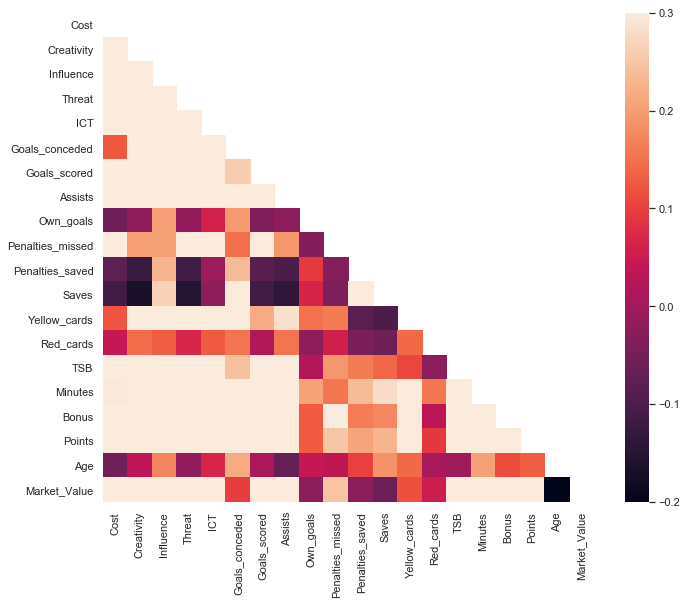

In [29]:
sns.set(style='white')
corr = fpl_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3)

#### Pairplot 

Pairplot between all columns to identify the relationship

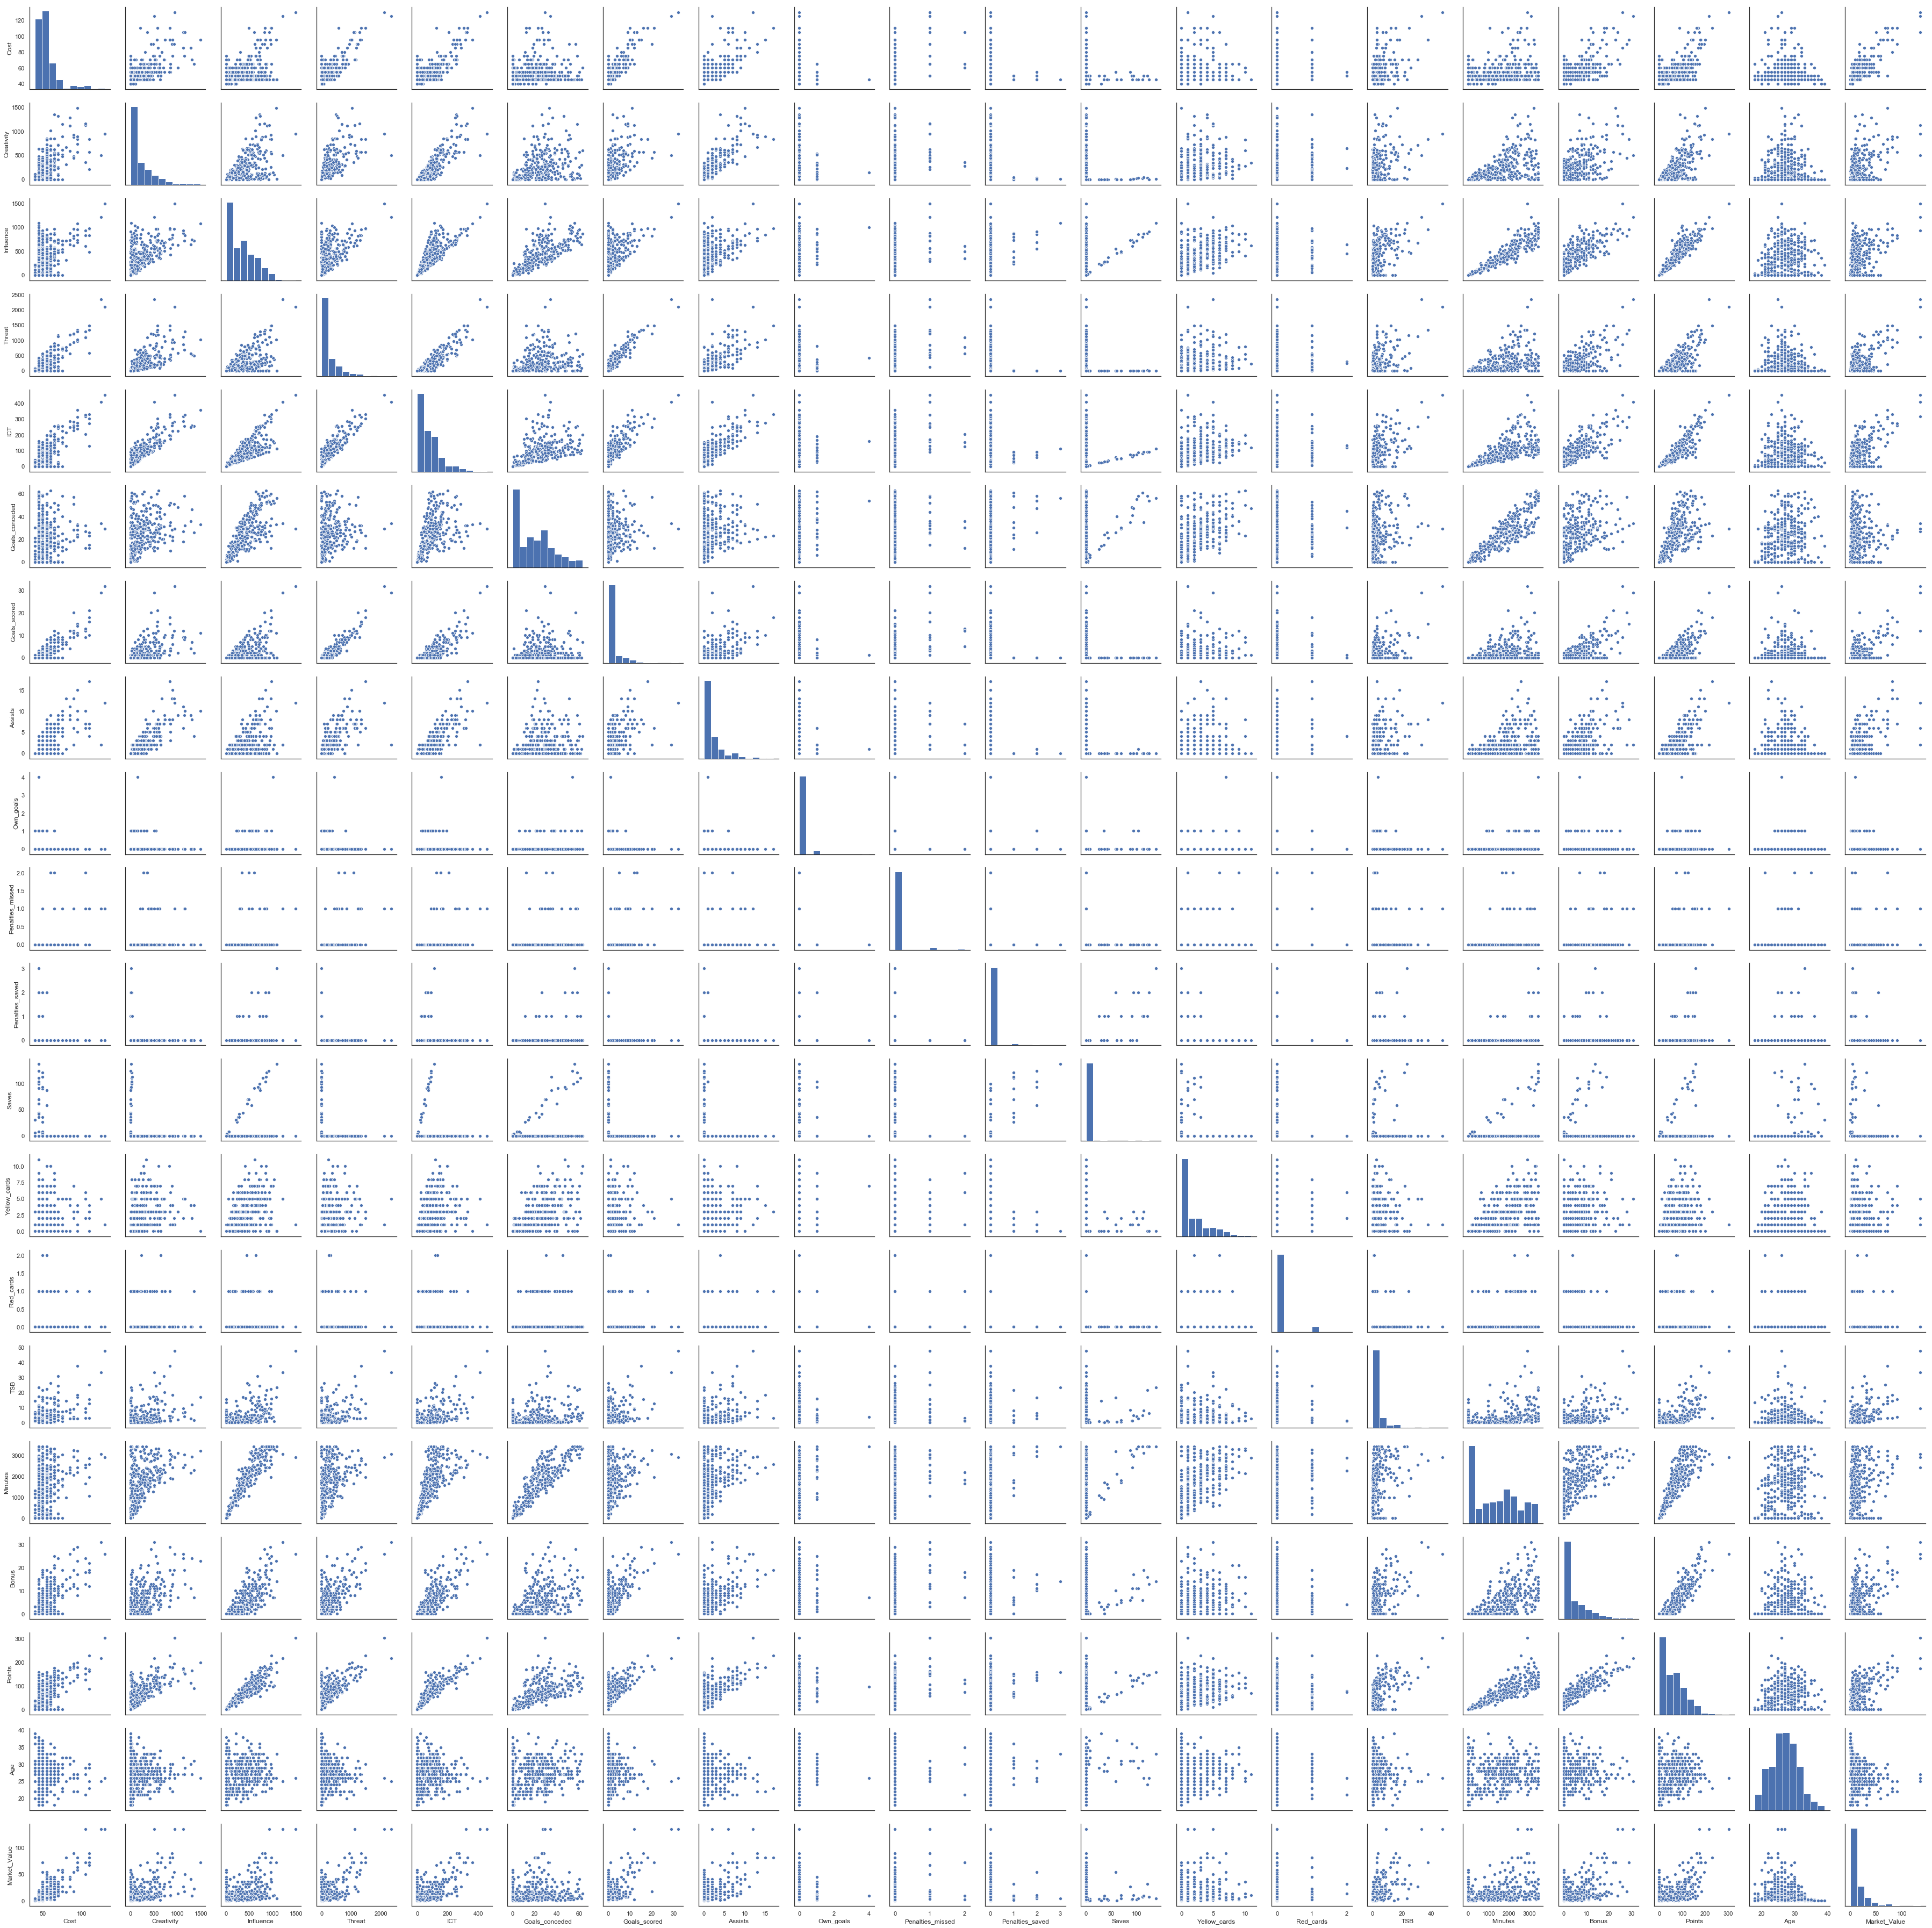

In [30]:
sns.pairplot(fpl_df)

#### Clustering

Applying KMeans clustering to understand how players can be grouped based on ICT value. ICT is a factor of influence, creativity and threat. The points scored by each player is a result of ICT. From the below KMeans application we can group the players as 2 clusters. Low ICT and High ICT.

In [31]:
"""#print(fpl_df.count())
from sklearn.preprocessing import StandardScaler
scaled_features = fpl_df.copy()
col_names = ['Age', 'Market_Value']
features = scaled_features[col_names]
scaler = StandardScaler().fit_transform(features.values)
#features = scaler.transform(features.values)
scaled_features[col_names] = features
#print(scaled_features)
#fpl_df[['Age','Market_Value']] = fpl_df[['Age','Market_Value']].apply(lambda x: StandardScaler().fit_transform(x))
#fpl_df.head(5)
f1 = scaled_features['Age'].values
f2 = scaled_features['Market_Value'].values

plt.xlabel('Age')
plt.ylabel('Market_Value')
plt.scatter(f1, f2, c='black', s=7)
plt.show()"""

"#print(fpl_df.count())\nfrom sklearn.preprocessing import StandardScaler\nscaled_features = fpl_df.copy()\ncol_names = ['Age', 'Market_Value']\nfeatures = scaled_features[col_names]\nscaler = StandardScaler().fit_transform(features.values)\n#features = scaler.transform(features.values)\nscaled_features[col_names] = features\n#print(scaled_features)\n#fpl_df[['Age','Market_Value']] = fpl_df[['Age','Market_Value']].apply(lambda x: StandardScaler().fit_transform(x))\n#fpl_df.head(5)\nf1 = scaled_features['Age'].values\nf2 = scaled_features['Market_Value'].values\n\nplt.xlabel('Age')\nplt.ylabel('Market_Value')\nplt.scatter(f1, f2, c='black', s=7)\nplt.show()"

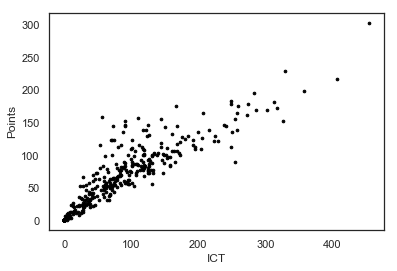

In [59]:
f1 = fpl_df['ICT'].values
f2 = fpl_df['Points'].values

plt.xlabel('ICT')
plt.ylabel('Points')
plt.scatter(f1, f2, c='black', s=7)
plt.show()

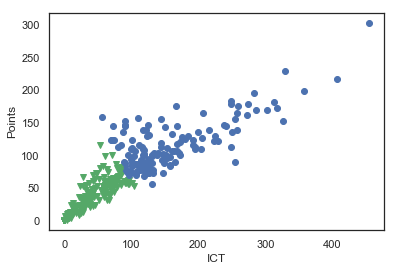

In [60]:
from sklearn.cluster import KMeans

M=np.matrix(list(zip(f1, f2)))
kmeans = KMeans(n_clusters=2).fit(M)
#centers = kmeans.cluster_centers_
y_pred = kmeans.predict(M)

colors = ['b', 'g', 'm', 'y', 'c']
markers = ['o', 'v', 'x', 'o', 's']
#center_colors = colors[:len(y_pred)]

plt.xlabel('ICT')
plt.ylabel('Points')
for i, l in enumerate(kmeans.labels_):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')

#### Gaussian Mixture Model

From KMEans we understand that as player ICT value increases the points he scores also increase. We apply GMM to understand if the data can be further hard clustered. In this we notice even though as ICT increases points also increase but there are players with low ICT and high points as well.

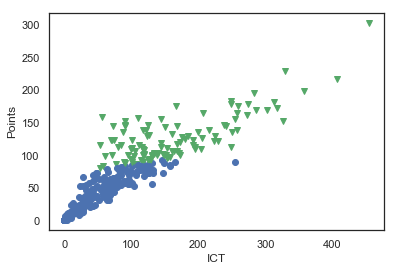

In [61]:
import warnings
from sklearn.mixture import GaussianMixture

warnings.filterwarnings("ignore", category=DeprecationWarning)

M=np.matrix(list(zip(f1, f2)))
gmm = GaussianMixture(n_components=2,  covariance_type='tied', random_state=0).fit(M)
labels = gmm.predict(M)

plt.xlabel('ICT')
plt.ylabel('Points')

for i, l in enumerate(labels):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')

#### Linear Regression

In this we are trying to predict the points a player will score based on his ICT value. From the pairplot we notice that ICT and points are lineraly related. Predicting the points a player will score enables the team to identify the best possible winning team combination for a given week.Applying linear regression on ICT and Points to predict the points player might score. We notice the prediction has a R2 value of 91.3% which indicates that the model is good.

In [62]:
X = fpl_df[['ICT']]
y = fpl_df[['Points']]

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.8213529249888842

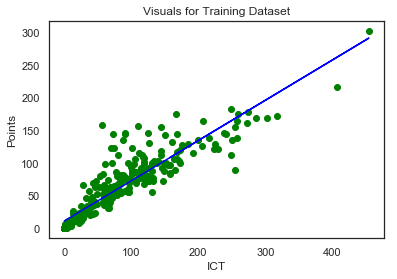

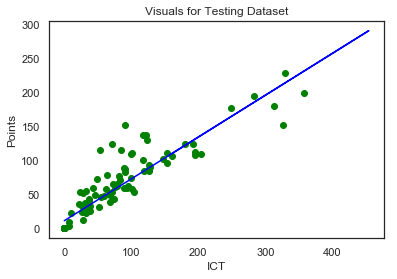

In [64]:
y_pred = regression_model.predict(X_test) 

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("ICT")
plt.ylabel("Points")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Testing Dataset")
plt.xlabel("ICT")
plt.ylabel("Points")
plt.show()

In [65]:
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     4167.
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          5.90e-213
Time:                        18:49:37   Log-Likelihood:                -1825.0
No. Observations:                 399   AIC:                             3652.
Df Residuals:                     398   BIC:                             3656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ICT            0.6914      0.011     64.552      0.000       0.670       0.712
==============================================================================
Omnibus:                       92.317   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.876
Skew:                           0.921   Prob(JB):                     2.21e-90
Kurtosis:                       7.630   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Clustering and Regression Use Case 2

Clustering players based on Points and Market Value. We can classify the players based on the price they are paid.Here, we try and predict the market value which is the amount a player is paid based on his performance. 

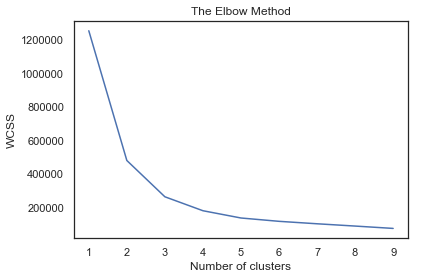

In [66]:
## Identify the K value for KMeans using elbow method
from sklearn.cluster import KMeans

X = fpl_df[['Points','Market_Value']]
#X.info()
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

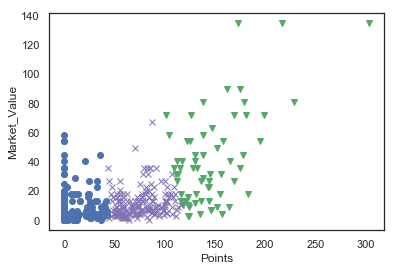

In [67]:
f1 = fpl_df['Points'].values
f2 = fpl_df['Market_Value'].values

from sklearn.cluster import KMeans

M=np.matrix(list(zip(f1, f2)))
kmeans = KMeans(n_clusters=3).fit(M)
#centers = kmeans.cluster_centers_
y_pred = kmeans.predict(M)

colors = ['b', 'g', 'm', 'y', 'c']
markers = ['o', 'v', 'x', 'o', 's']
#center_colors = colors[:len(y_pred)]

plt.xlabel('Points')
plt.ylabel('Market_Value')
for i, l in enumerate(kmeans.labels_):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')

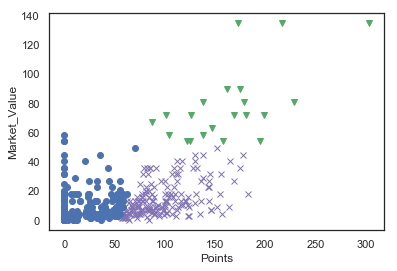

In [68]:
import warnings
from sklearn.mixture import GaussianMixture

warnings.filterwarnings("ignore", category=DeprecationWarning)

M=np.matrix(list(zip(f1, f2)))
gmm = GaussianMixture(n_components=3,  covariance_type='tied', random_state=0).fit(M)
labels = gmm.predict(M)

plt.xlabel('Points')
plt.ylabel('Market_Value')

for i, l in enumerate(labels):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')

In [74]:
X = fpl_df[['Points']]
y = fpl_df[['Market_Value']]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.4087159658401529

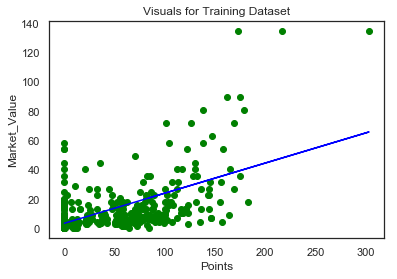

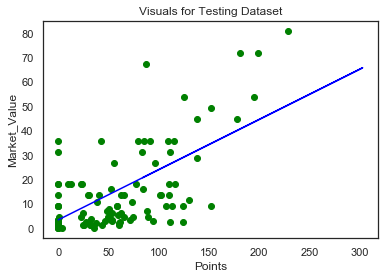

In [75]:
y_pred = regression_model.predict(X_test) 

#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Points")
plt.ylabel("Market_Value")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'green')
plt.plot(X_train, regression_model.predict(X_train), color = 'blue')
plt.title ("Visuals for Testing Dataset")
plt.xlabel("Points")
plt.ylabel("Market_Value")
plt.show()

In [76]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.448e+33
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:50:58   Log-Likelihood:                 12079.
No. Observations:                 399   AIC:                        -2.416e+04
Df Residuals:                     398   BIC:                        -2.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Points         1.0000   1.09e-17   9.19e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       47.698   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.789
Skew:                          -0.871   Prob(JB):                     2.32e-14
Kurtosis:                       3.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### PCA and Linear Regression

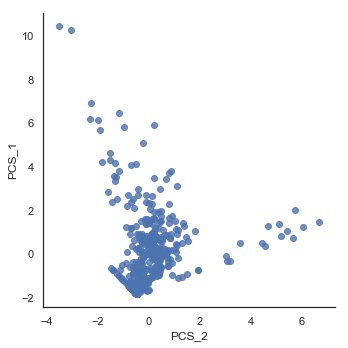

In [77]:
cols=['ICT', 'Goals_conceded', 'Goals_scored', 'Saves', 'Bonus', 'Market_Value']
X = fpl_df[cols].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

fpl_df["PCS_1"] = Y_sklearn[:,0]
fpl_df["PCS_2"] = Y_sklearn[:,1]
sns.lmplot("PCS_2","PCS_1", data=fpl_df,fit_reg=False)

plt.show()

RMSE:13.402541649591369


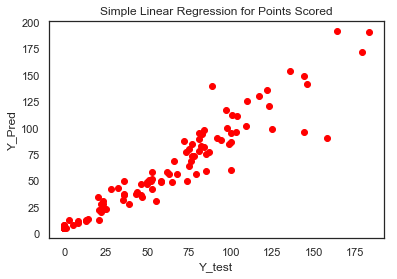

In [79]:
### Apply PCA and check the linear regression
cols.extend(['PCS_1', 'PCS_2'])
#cols.remove('Points')
X = fpl_df[cols].iloc[ :, :].values
Y = fpl_df['Points']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

regression_model = LinearRegression(normalize=True)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:{}'.format(rmse))

# Plotting graph
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Simple Linear Regression for Points Scored')
plt.xlabel('Y_test')
plt.ylabel('Y_Pred')
plt.show()

In [80]:
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     918.8
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          2.30e-227
Time:                        18:51:52   Log-Likelihood:                -1605.8
No. Observations:                 399   AIC:                             3226.
Df Residuals:                     392   BIC:                             3253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3949      0.026     15.211      0.000       0.344       0.446
x2             0.5736      0.067      8.504      0.000       0.441       0.706
x3            -0.8192      0.371     -2.206      0.028      -1.549      -0.089
x4             0.3753      0.043      8.670      0.000       0.290       0.460
x5             2.9279      0.216     13.565      0.000       2.504       3.352
x6             0.2369      0.050      4.752      0.000       0.139       0.335
x7            -1.0747      0.297     -3.615      0.000      -1.659      -0.490
x8            -0.1776      0.091     -1.947      0.052      -0.357       0.002
x9            -1.0747      0.297     -3.615      0.000      -1.659      -0.490
x10           -0.1776      0.091     -1.947      0.052      -0.357       0.002
==============================================================================
Omnibus:                       69.818   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.130
Skew:                           0.826   Prob(JB):                     1.15e-42
Kurtosis:                       5.981   Cond. No.                     6.47e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Data Enrichment

Enrich the fpl 2017 data with 2018 and 2019 scores, points, ict and clean sheets for further analysis

In [112]:
def extract_player_ids():
    url = "https://fantasy.premierleague.com/drf/bootstrap-static"
    response  = requests.get(url)
    data = json.loads(response.text)
    all_players = data['elements']

    player_ids = {}
    for player in all_players:
        player_ids[player['id']] = player['web_name']
    return(player_ids)

In [113]:
def extract_gameweek_scores():
    player_ids = extract_player_ids()
    player_details = []
    for player in player_ids:
        details = {}
        url = "https://fantasy.premierleague.com/drf/element-summary/" + str(player)
        response  = requests.get(url)
        data = json.loads(response.text)
        history = data['history']
        #print(value)
        details['Name'] = player_ids[player]
        details['Player_Id'] = player
        count = 1
        for value in history:
            #print([int(value['goals_scored']), int(value['total_points']),int(value['clean_sheets']),float(value['ict_index'])])
            s = str(count)
            details['goals_scored_GW'+s] = value['goals_scored']
            details['total_points_GW'+s] = value['total_points']
            details['clean_sheets_GW'+s] = value['clean_sheets']
            details['ict_index_GW'+s] = value['ict_index']
            details['bps_GW'+s] = value['bps']
            details['bonus_GW'+s] = value['bps']
            details['saves_GW'+s] = value['saves']
            details['transfers_balance_GW'+s] = value['transfers_balance']
            details['transfers_in_GW'+s] = value['transfers_in']
            details['transfers_out_GW'+s] = value['transfers_out']
            details['value_GW'+s] = value['value']
            details['selected_GW'+s] = value['selected']
            details['assists_GW'+s] = value['assists']
            #details.append({'goals_scored_GW'+s:value['goals_scored'], 'total_points_GW'+s:value['total_points'], 'clean_sheets_GW'+s:value['clean_sheets'], 
                                  # 'ict_index_GW'+s:value['ict_index']})
            count = count + 1
        player_details.append(details)
    player_details = pd.DataFrame(player_details)
    #print(player_details)
    return(player_details)

In [114]:
fpl_201819 = extract_gameweek_scores()
fpl_201819 = fpl_201819.replace({'\u00c4':'A', '\u00e4':'a','\u00cb':'E', '\u00eb':'e','\u00e9':'e','\u00cf':'I', '\u00ef':'i','\u00d6': 'O', 
                                       '\u00f6' : 'o','\u00dc':'U','\u00fc':'u','\u03b2':'ss', 'í':'i','ß': 'ss','á' : 'a', 'à' : 'a','Á':'A', 'ó' : 'o','ã':'a' , 'ø':'o', 
                                       '\u00e0':'a','\u00e2':'a','\u00e6':'a','\u00e8':'e','\u00e9':'e','\u00eA':'e','\u00ee':'i','\u00f4':'o','\u0153':'o','\u00f9':'u',
                                       '\u00fb':'u','\u00ff':'y','\u00e7':'c','\u00c0':'A','\u00c2':'A','\u00c6':'A','\u00c8':'E','\u00c9':'E','\u00ca':'E','\u00ce':'I',
                                       '\u00d4':'O','\u0152':'O','\u00d9':'U','\u00db':'U','\u0178':'Y','\u00c7':'C'}, regex=True)
fpl_201819.to_csv('input_data/fpl/fpl_2018_19.csv'.format(os.getcwd()))

In [115]:
fpl_df2 = pd.merge(fpl_df,fpl_201819, on=['Name'], how='left')

In [116]:
print(fpl_df2['Name'].count())
fpl_df2.head(5)

414


,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,Goals_scored,...,transfers_out_GW9,value_GW1,value_GW2,value_GW3,value_GW4,value_GW5,value_GW6,value_GW7,value_GW8,value_GW9
0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,1,...,2436.0,45,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,0,...,696.0,45,45.0,45.0,45.0,44.0,44.0,44.0,44.0,44.0
2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,21,...,71557.0,110,110.0,112.0,113.0,114.0,114.0,114.0,114.0,113.0
3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,2,...,6849.0,50,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,2,...,2730.0,55,54.0,54.0,53.0,53.0,53.0,53.0,53.0,52.0


In [117]:
fpl_df2.to_csv('input_data/fpl/all_fpl_new.csv'.format(os.getcwd()))

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

all_fpl = pd.read_csv('input_data/fpl/all_fpl_new.csv')
all_fpl = all_fpl[all_fpl['Name']!='Deulofeu']
all_fpl = all_fpl.fillna(0)

#### Classification Algorithms

Classify players that will score >=8 points in a given gameweek based on historical data for previous gameweeks.
Attributes considered ( Total Goals Scored, Total Points, Cleansheets )
In order to build the data set we had to web scrapping of FPL data leverage fantasy.premierleague.com website. 
The site is built using react and we reviewed the XHR calls the network tab to find the services that we could leverage to build our data

Join these using the player id and name for market value from other websites
We converted the dataset to a classification problem for every player.

Classification problem : Will a player Score >=8 points ( 1-True, 0-False )
Influential Features : Attributes considered ( Total Goals Scored, Total Points, Cleansheets, Saves, BPS, Bonus, Assists )

Created 'all_features' which will have list of all features for the previous 7 gameweeks [ X_TRAIN ]
Created 'labels' which will have list of outcomes based on actual score [Y_TRAIN]

INPUT FOR PREDICTION in GW8 : [X_TEST]

In [220]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

all_algo_performance = []
def estimate_score(y_test, y_pred, classifier):
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)

    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
    algo_performance = {'algorithm':classifier, 'accuracy': accuracy_score(y_test,y_pred)*100, 'precision':precision, 'recall':recall, 'fscore':fscore}
    all_algo_performance.append(algo_performance)
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix for Random Forest', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [213]:
def print_results(actual_players, predict_players):
    print("Actual Players who scored more than 8 points")
    print(actual_players)
    print(len(actual_players))

    print("Predicted Players who scored more than 8 points")
    print(predict_players)
    print(len(predict_players))

In [223]:
np.seterr(divide='ignore', invalid='ignore')
def classify_players_more_than_8_points(clf, classifier_name):
    gameweeks = [1,2,3,4,5,6,7,8]
    predict_labels = []
    actual_labels = []
    actual_players = []
    predict_players = []

    for index, row in all_fpl.iterrows():
        all_features = []
        labels = []
        #print (row['Name'])
        for j in gameweeks:
            features = [int(row['goals_scored_GW'+str(j)]),int(row['clean_sheets_GW'+str(j)]),int(row['bonus_GW'+str(j)]),int(row['bps_GW'+str(j)]),int(row['saves_GW'+str(j)]),int(row['assists_GW'+str(j)])]
        #print (j, ':',features)
            all_features.append(features)
            if int(row['total_points_GW'+str(j)])>=8:
                labels.append(1)
            else:
                labels.append(0)

        x_train = all_features
        y_train = labels
        
        all_zeros = not np.any(labels)
        if all_zeros:
            continue
    
        j=8
        y_test = []
        x_test = [[int(row['goals_scored_GW'+str(j)]),int(row['clean_sheets_GW'+str(j)]),int(row['bonus_GW'+str(j)]),int(row['bps_GW'+str(j)]),int(row['saves_GW'+str(j)]),int(row['assists_GW'+str(j)])]]
        if int(row['total_points_GW'+str(j+1)])>=8:
            y_test.append(1)
            actual_players.append(row['Name'])
        else:
            y_test.append(0)
    
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)
        
        clf.fit(x_train,y_train)
        
        y_pred = clf.predict(x_test)
    
        actual_labels.append(y_test)
        predict_labels.append(y_pred)
        if y_pred == 1:
            predict_players.append(row['Name'])
    estimate_score(actual_labels,predict_labels,classifier_name)
    #print_results(actual_players, predict_players)

#### Naive Bayes

- Data Story

The data story is to predict if a player will score more than or equal to 8 points in a certain gameweek. This will allow the FPL manager to identify players they want to transfer in or out for a certain week. This also helps in identifying the captain. In FPL more than 7 points is a decent score.

accuracy: 76.85950413223141
precision: [0.89795918 0.2173913 ]
recall: [0.83018868 0.33333333]
fscore: [0.8627451  0.26315789]
support: [106  15]


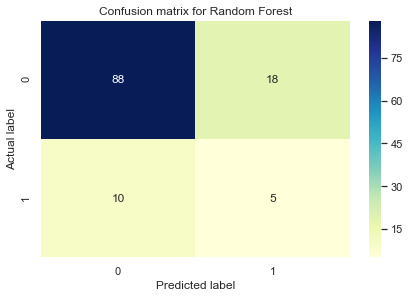

In [224]:
from sklearn.naive_bayes import GaussianNB
classify_players_more_than_8_points(GaussianNB(), 'Naive Bayes')

#### Random Forest

- Data Story

The data story is to predict if a player will score more than or equal to 8 points in a certain gameweek. This will allow the FPL manager to identify players they want to transfer in or out for a certain week. This also helps in identifying the captain. In FPL more than 7 points is a decent score.

accuracy: 76.85950413223141
precision: [0.89795918 0.2173913 ]
recall: [0.83018868 0.33333333]
fscore: [0.8627451  0.26315789]
support: [106  15]


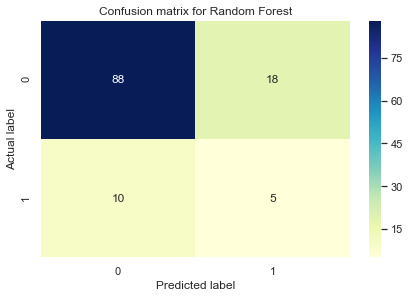

In [225]:
from sklearn.ensemble import RandomForestClassifier
classify_players_more_than_8_points(RandomForestClassifier(n_estimators=100, random_state=42), 'Random Forest')

#### Decision Tree

accuracy: 76.85950413223141
precision: [0.89795918 0.2173913 ]
recall: [0.83018868 0.33333333]
fscore: [0.8627451  0.26315789]
support: [106  15]


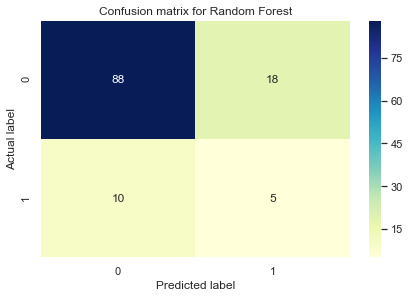

In [226]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
classify_players_more_than_8_points(decision_tree, 'Decision Tree')

In [41]:
from sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(decision_tree,
                     out_file = "ratingDCTree.dot",
                     feature_names = features,
                     filled=True, rounded=True, special_characters=True)

In [41]:
!dot -Tpng ratingDCTree.dot -o ratingDCTree.png

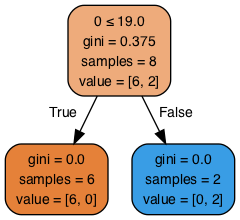

In [42]:
PATH = !pwd
Image(filename = PATH[0] + "/ratingDCTree.png")

#### Data Story



In [191]:
np.seterr(divide='ignore', invalid='ignore')
def classify_players_for_selection(clf, classifier_name):
    gameweeks = [2,3,4,5,6,7,8]
    predict_labels = []
    actual_labels = []
    actual_players = []
    predict_players = []

    for index, row in all_fpl.iterrows():
        all_features = []
        labels = []
        #print (row['Name'])
        for j in gameweeks:
            features = [int(row['goals_scored_GW'+str(j)]),int(row['clean_sheets_GW'+str(j)]),int(row['bonus_GW'+str(j)]),int(row['bps_GW'+str(j)]),
                        int(row['transfers_balance_GW'+str(j)]),int(row['selected_GW'+str(j)]),int(row['assists_GW'+str(j)])]
        #print (j, ':',features)
            all_features.append(features)
            if int(row['value_GW'+str(j)])-int(row['value_GW'+str(j-1)])>0:
                labels.append(1)
            elif int(row['value_GW'+str(j)]) - int(row['value_GW'+str(j-1)]) <0:
                labels.append(-1)
            else:
                labels.append(0)

        x_train = all_features
        y_train = labels
    
        all_zeros = not np.any(labels)
        if all_zeros:
            continue
    
        j=9
        y_test = []
        x_test = [[int(row['goals_scored_GW'+str(j)]),int(row['clean_sheets_GW'+str(j)]),int(row['bonus_GW'+str(j)]),int(row['bps_GW'+str(j)]),
                   int(row['transfers_balance_GW'+str(j)]),int(row['selected_GW'+str(j)]),int(row['assists_GW'+str(j)])]]
        if int(row['value_GW'+str(j)])-int(row['value_GW'+str(j-1)])>0:
            y_test.append(1)
        elif int(row['value_GW'+str(j)]) - int(row['value_GW'+str(j-1)])<0:
            y_test.append(-1)
        else:
            y_test.append(0)
    
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)

        clf.fit(x_train,y_train)
        
        y_pred = clf.predict(x_test)
    
        actual_labels.append(y_test)
        predict_labels.append(y_pred)
    estimate_score(actual_labels,predict_labels,classifier_name)

#### Logistic Regression

accuracy: 70.87087087087087
precision: [0.15789474 0.77854671 0.83333333]
recall: [0.09677419 0.87209302 0.38461538]
fscore: [0.12       0.8226691  0.52631579]
support: [ 62 258  13]


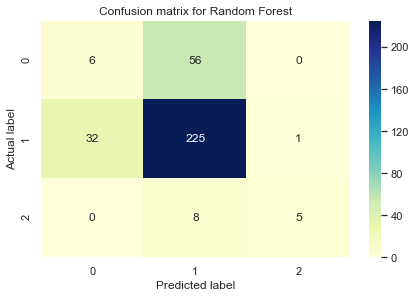

In [192]:
from sklearn.linear_model import LogisticRegression
classify_players_for_selection(LogisticRegression(random_state=42), 'Logistic Regression')

#### SVM

accuracy: 75.97597597597597
precision: [0.27272727 0.7866242  0.375     ]
recall: [0.0483871  0.95736434 0.23076923]
fscore: [0.08219178 0.86363636 0.28571429]
support: [ 62 258  13]


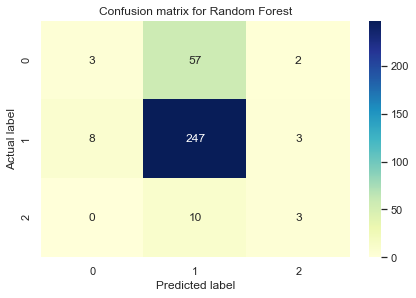

In [193]:
from sklearn.svm import SVC
classify_players_for_selection(SVC(random_state = 42), 'SVM')

#### KNN

accuracy: 74.47447447447448
precision: [0.08333333 0.77460317 0.5       ]
recall: [0.01612903 0.94573643 0.23076923]
fscore: [0.02702703 0.85165794 0.31578947]
support: [ 62 258  13]


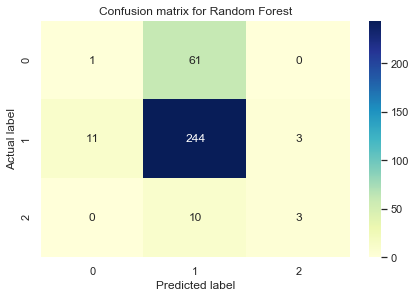

In [194]:
from sklearn.neighbors import KNeighborsClassifier
classify_players_for_selection(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 'KNN')

#### Feature Selection using Random Forest

In [147]:
gameweeks = [1,2,3,4,5,6,7,8,9]
all_points = []
all_ict = []
all_bps = []
all_cleansheets = []
all_saves = []
all_assists = []
all_goals = []
all_bonus = []
for index, row in all_fpl.iterrows():
    points = []
    ict = []
    bps = []
    cleansheets = []
    saves = []
    assists = []
    goals = []
    bonus = []
    for j in gameweeks:
        points.append(int(row['total_points_GW'+str(j)]))
        ict.append(int(row['ict_index_GW'+str(j)]))
        bps.append(int(row['bps_GW'+str(j)]))
        cleansheets.append(int(row['clean_sheets_GW'+str(j)]))
        saves.append(int(row['saves_GW'+str(j)]))
        assists.append(int(row['assists_GW'+str(j)]))
        goals.append(int(row['goals_scored_GW'+str(j)]))
        bonus.append(int(row['bonus_GW'+str(j)]))
    
    sum_ict = 0
    sum_bps = 0
    sum_cleansheets = 0
    sum_saves = 0
    sum_assists = 0
    sum_goals = 0
    sum_bonus = 0
    for i in range(0,8):
        sum_ict = sum_ict + (ict[i])/((max(ict)-min(ict)+1))
        sum_bps = sum_bps + (bps[i])/((max(bps)-min(bps)+1))
        sum_cleansheets = sum_cleansheets + (cleansheets[i])/((max(cleansheets)-min(cleansheets)+1))
        sum_saves = sum_saves + (saves[i])/((max(saves)-min(saves)+1))
        sum_assists = sum_assists + (assists[i])/((max(assists)-min(assists)+1))
        sum_goals = sum_goals + (goals[i])/((max(goals)-min(goals)+1))
        sum_bonus = sum_bonus + (bonus[i])/((max(bonus)-min(bonus)+1))
    
    all_points.append(sum(points))
    all_ict.append(sum_ict)
    all_bps.append(sum_bps)
    all_cleansheets.append(sum_cleansheets)
    all_saves.append(sum_saves)
    all_assists.append(sum_assists)
    all_goals.append(sum_goals)
    all_bonus.append(sum_bonus)
    #print(sum_ict)

In [148]:
all_fpl['Points_2018'] = all_points
all_fpl['ICT_2018'] = all_ict
all_fpl['BPS_2018'] = all_bps
all_fpl['Bonus_2018'] = all_bonus
all_fpl['Clean_Sheets_2018'] = all_cleansheets
all_fpl['Saves_2018'] = all_saves
all_fpl['Assists_2018'] = all_assists
all_fpl['Goals_2018'] = all_goals

In [150]:
all_fpl.head(5)

,Unnamed: 0,Name,Team,Position,Cost,Creativity,Influence,Threat,ICT,Goals_conceded,...,value_GW8,value_GW9,Points_2018,ICT_2018,BPS_2018,Bonus_2018,Clean_Sheets_2018,Saves_2018,Assists_2018,Goals_2018
0,0,Adam Smith,BOU,DEF,45,345.5,455.0,144.0,94.5,38,...,45.0,45.0,30,2.833333,5.818182,5.818182,1.0,0.0,0.000000,0.50
1,1,Adrian,WHU,GKP,45,0.0,470.4,0.0,47.0,29,...,44.0,44.0,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00
2,2,Aguero,MCI,FWD,110,570.8,966.4,1484.0,302.5,12,...,114.0,113.0,58,3.666667,2.392857,2.392857,2.0,0.0,1.333333,1.25
3,3,Ake,BOU,DEF,50,115.1,932.4,287.0,133.5,59,...,50.0,50.0,34,3.714286,4.793103,4.793103,1.0,0.0,0.000000,0.50
4,4,Albrighton,LEI,MID,55,718.3,580.0,300.0,160.2,42,...,53.0,52.0,16,2.500000,2.739130,2.739130,0.0,0.0,0.500000,0.50


In [166]:
cols = ['Points_2018', 'ICT_2018', 'BPS_2018', 'Bonus_2018', 'Clean_Sheets_2018', 'Saves_2018', 'Assists_2018', 'Goals_2018']

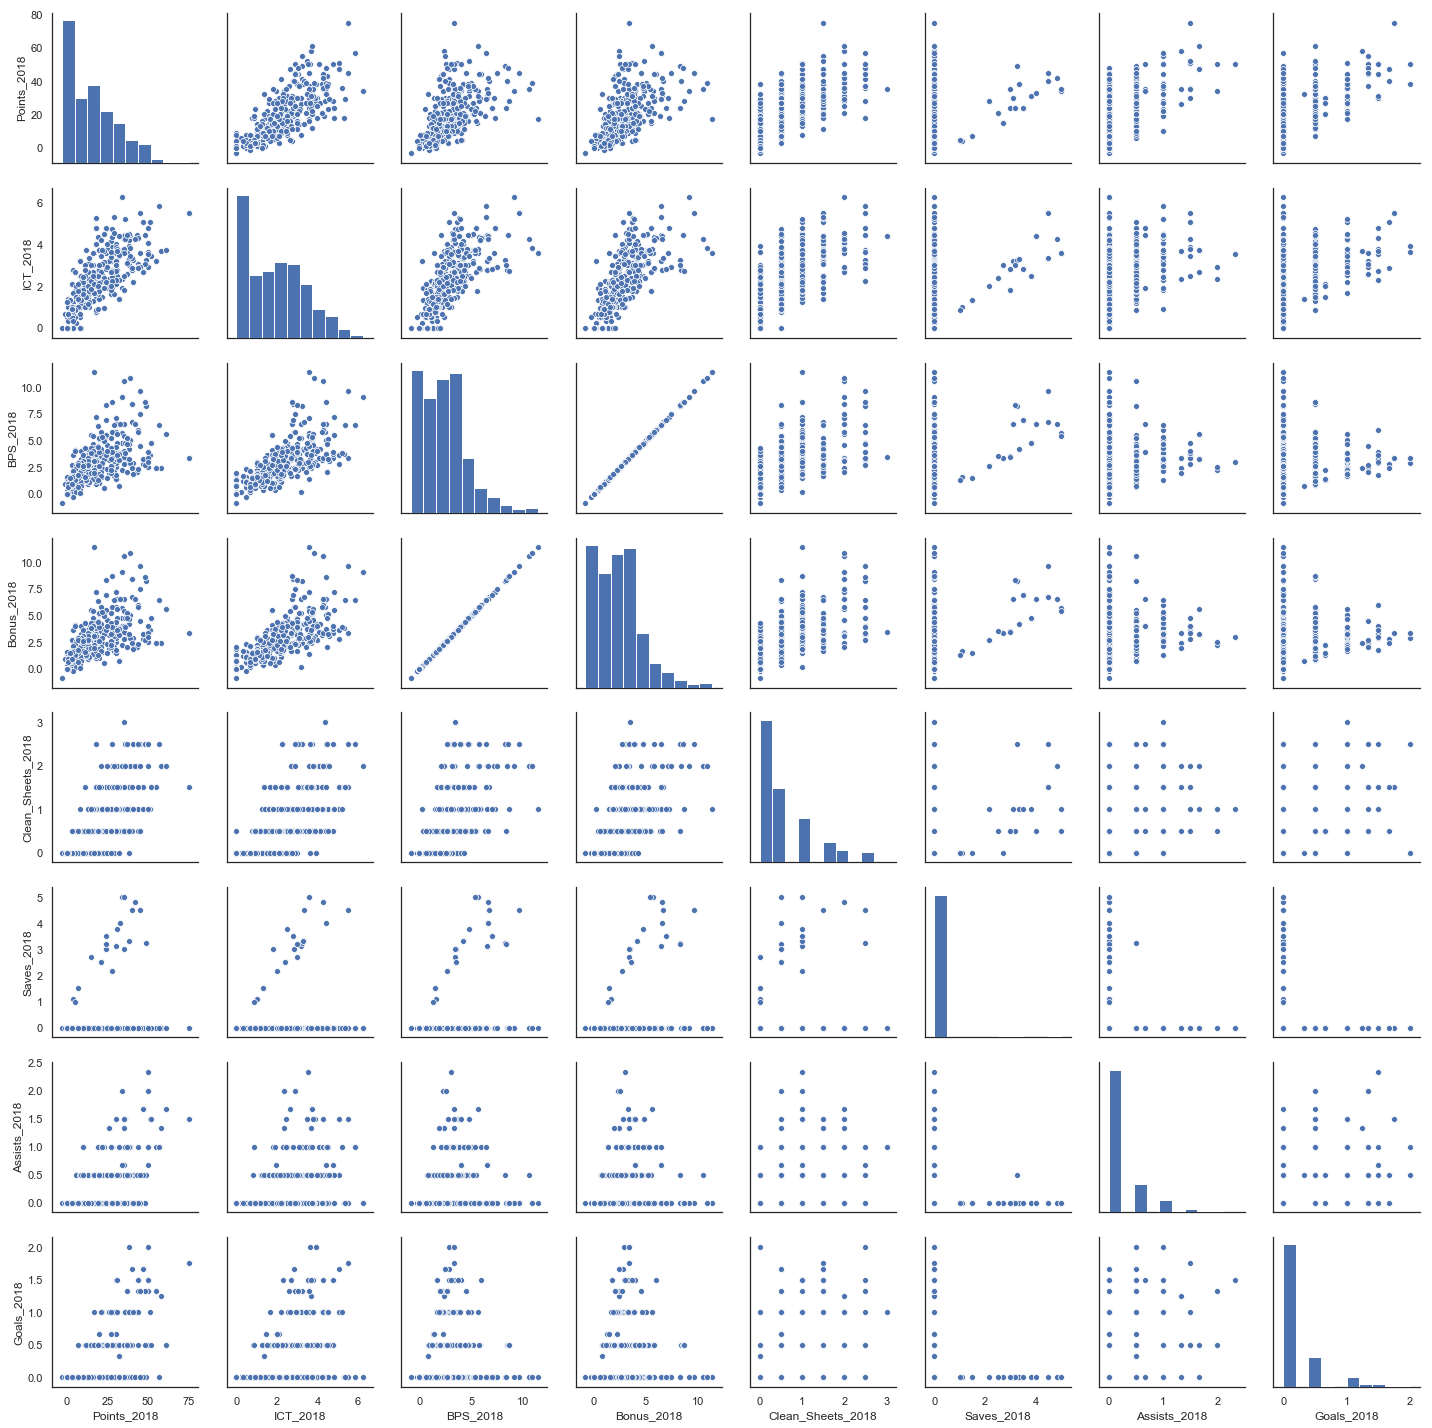

In [152]:
sns.pairplot(all_fpl[cols])

4.391229196649994


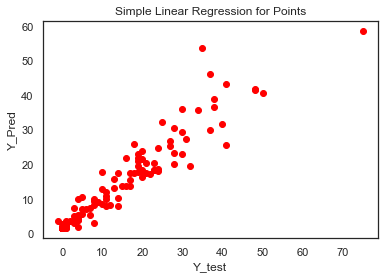

In [167]:
### Apply PCA and check the linear regression
cols.remove('Points_2018')
X = all_fpl[cols].iloc[ :, :].values
Y = all_fpl['Points_2018']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

regression_model = LinearRegression(normalize=True)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(mse)

# Plotting graph
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Simple Linear Regression for Points')
plt.xlabel('Y_test')
plt.ylabel('Y_Pred')
plt.show()

In [168]:
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Points_2018   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1248.
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          1.78e-258
Time:                        20:15:13   Log-Likelihood:                -1243.1
No. Observations:                 413   AIC:                             2498.
Df Residuals:                     407   BIC:                             2522.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0192      0.334      6.047      0.000       1.363       2.676
x2             0.7211      0.109      6.587      0.000       0.506       0.936
x3             0.7211      0.109      6.587      0.000       0.506       0.936
x4             6.0101      0.535     11.231      0.000       4.958       7.062
x5             2.9280      0.354      8.272      0.000       2.232       3.624
x6             8.8521      0.722     12.256      0.000       7.432      10.272
x7            12.6807      0.773     16.404      0.000      11.161      14.200
==============================================================================
Omnibus:                       61.093   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.161
Skew:                           0.686   Prob(JB):                     3.39e-39
Kurtosis:                       5.901   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [169]:
X = X = all_fpl[cols].iloc[ :, :].values
Y = all_fpl['Points_2018']

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

all_fpl["PCS_3"] = Y_sklearn[:,0]
all_fpl["PCS_4"] = Y_sklearn[:,1]
"""sns.lmplot("PCS_3","PCS_4", data=all_fpl,fit_reg=False)

plt.show()"""

cols.append('PCS_3')
cols.append('PCS_4')
#print(cols)

4.395070699416903


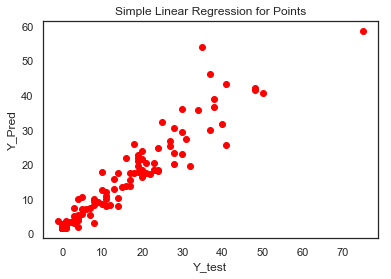

In [171]:
X = all_fpl[cols].iloc[ :, :].values
Y = all_fpl['Points_2018']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

regression_model = LinearRegression(normalize=True)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(mse)

# Plotting graph
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Simple Linear Regression for Points')
plt.xlabel('Y_test')
plt.ylabel('Y_Pred')
plt.show()

In [172]:
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Points_2018   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     564.7
Date:                Mon, 22 Oct 2018   Prob (F-statistic):          1.54e-193
Time:                        20:15:40   Log-Likelihood:                -1239.0
No. Observations:                 413   AIC:                             2492.
Df Residuals:                     406   BIC:                             2520.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6022      0.342      4.687      0.000       0.930       2.274
x2             1.4114      0.125     11.331      0.000       1.167       1.656
x3             1.4114      0.125     11.331      0.000       1.167       1.656
x4             6.0004      0.561     10.695      0.000       4.897       7.103
x5             7.1718      0.402     17.828      0.000       6.381       7.963
x6             2.3669      0.605      3.912      0.000       1.177       3.556
x7             5.4488      0.585      9.320      0.000       4.299       6.598
x8            -0.4607      0.172     -2.684      0.008      -0.798      -0.123
x9            -5.4323      0.245    -22.158      0.000      -5.914      -4.950
==============================================================================
Omnibus:                       76.923   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.652
Skew:                           0.891   Prob(JB):                     8.11e-46
Kurtosis:                       5.982   Cond. No.                     3.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [276]:
feature_labels = ['Goals_2018','ICT_2018', 'Clean_Sheets_2018', 'Saves_2018', 'Assists_2018', 'BPS_2018', 'Bonus_2018']
labels = []
for index,row in all_fpl.iterrows():
    if row['Points_2018'] > 25:
        labels.append(1)
    else:
        labels.append(0)

In [277]:
from sklearn.feature_selection import SelectFromModel
X = all_fpl[cols].iloc[ :, :].values
Y = labels

estimator = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
estimator.fit(X_train,y_train) 

for feature in zip(feature_labels, estimator.feature_importances_):
    print(feature)

sfm = SelectFromModel(estimator, threshold=0.15)
sfm.fit(X_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

('Goals_2018', 0.09563215602749305)
('ICT_2018', 0.04687035643631848)
('Clean_Sheets_2018', 0.12227574256638286)
('Saves_2018', 0.7352217449698054)
Saves_2018


In [280]:
cols = ['Goals_2018', 'Clean_Sheets_2018', 'ICT_2018','Saves_2018']

X = all_fpl[cols].iloc[ :, 0:].values
Y = labels

def classification_after_feature_selection(clf, classifier):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    estimate_score(y_test,y_pred, classifier)

accuracy: 91.93548387096774
precision: [0.95555556 0.82352941]
recall: [0.93478261 0.875     ]
fscore: [0.94505495 0.84848485]
support: [92 32]


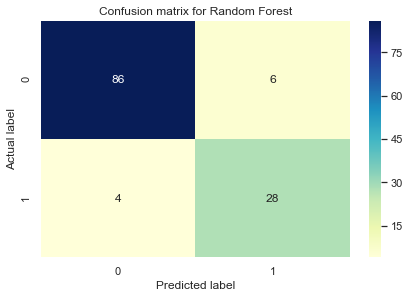

In [283]:
all_algo_performance = []
classification_after_feature_selection(GaussianNB(), 'Naive Bayes')

accuracy: 91.12903225806451
precision: [0.91752577 0.88888889]
recall: [0.9673913 0.75     ]
fscore: [0.94179894 0.81355932]
support: [92 32]


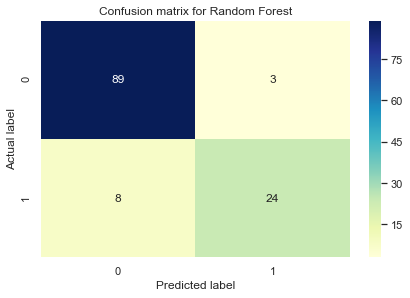

In [284]:
classification_after_feature_selection(RandomForestClassifier(n_estimators=100, random_state=42), 'Random Forest')

accuracy: 90.32258064516128
precision: [0.91666667 0.85714286]
recall: [0.95652174 0.75      ]
fscore: [0.93617021 0.8       ]
support: [92 32]


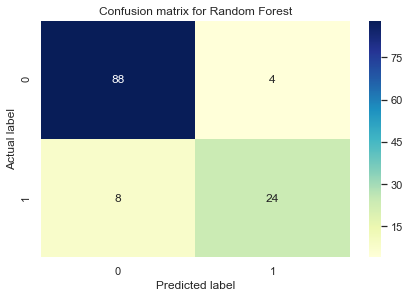

In [285]:
classification_after_feature_selection(DecisionTreeClassifier(max_depth=None, random_state=42), 'Decision Tree')

accuracy: 91.93548387096774
precision: [0.91836735 0.92307692]
recall: [0.97826087 0.75      ]
fscore: [0.94736842 0.82758621]
support: [92 32]


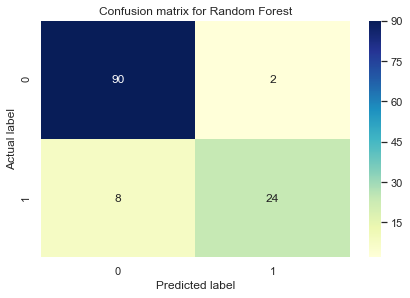

In [286]:
classification_after_feature_selection(LogisticRegression(random_state=42), 'Logistic Regression')

accuracy: 91.12903225806451
precision: [0.92631579 0.86206897]
recall: [0.95652174 0.78125   ]
fscore: [0.94117647 0.81967213]
support: [92 32]


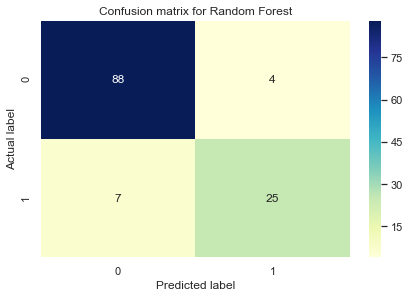

In [287]:
classification_after_feature_selection(SVC(random_state = 42), 'SVM')

accuracy: 92.74193548387096
precision: [0.92783505 0.92592593]
recall: [0.97826087 0.78125   ]
fscore: [0.95238095 0.84745763]
support: [92 32]


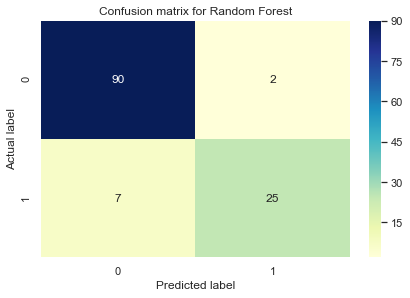

In [288]:
classification_after_feature_selection(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 'KNN')

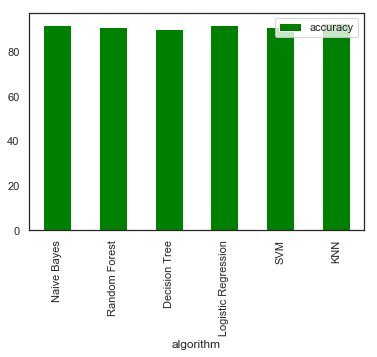

In [289]:
algo_performance_df = pd.DataFrame(all_algo_performance)
#print(algo_performance_df)
algo_performance_df.plot(x='algorithm', y='accuracy', kind='bar', color='green')